In [1]:
# Data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Imputing missing values
from sklearn.impute import KNNImputer

from scipy.stats import chi2_contingency

# Feature engineering
from sklearn.preprocessing import StandardScaler

# Model processing and testing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve, precision_score, recall_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.drop('Unnamed: 32', axis = 1, inplace = True)

In [4]:
df = df.drop('id', axis=1) #id column not necessary


In [5]:
df.diagnosis = [1 if i == "M" else 0 for i in df.diagnosis]


In [6]:
x = df.drop('diagnosis', axis = 1)
y = df['diagnosis']


smote = SMOTE()

x_oversample, y_oversample = smote.fit_resample(x, y)

print(y.value_counts())
print(y_oversample.value_counts())

0    357
1    212
Name: diagnosis, dtype: int64
1    357
0    357
Name: diagnosis, dtype: int64


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_oversample, y_oversample, test_size = 0.2, random_state = 0)

# LR

In [8]:
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred_log = log.predict(x_test)
cr = classification_report(y_test, y_pred_log)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        78
           1       0.97      0.94      0.95        65

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



/Users/sharmin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
print('Precision Score: ', round(precision_score(y_test, y_pred_log), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_log), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_log), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_log), 3))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_log), 2))

Precision Score:  0.97
Recall Score:  0.94
F1 Score:  0.95
Accuracy Score:  0.958
ROC AUC:  0.96


# RF

In [10]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
cr_rf = classification_report(y_test, y_pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        78
           1       0.97      0.95      0.96        65

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



In [46]:
print('Precision Score: ', round(precision_score(y_test, y_pred_rf), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_rf), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_rf), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_rf), 4))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_rf), 2))

Precision Score:  0.97
Recall Score:  0.95
F1 Score:  0.96
Accuracy Score:  0.965
ROC AUC:  0.96


# KNN

In [12]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
cr_knn = classification_report(y_test, y_pred_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        78
           1       0.94      0.92      0.93        65

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [13]:
print('Precision Score: ', round(precision_score(y_test, y_pred_knn), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_knn), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_knn), 3))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_knn), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_knn), 2))

Precision Score:  0.94
Recall Score:  0.92
F1 Score:  0.93
Accuracy Score:  0.94
ROC AUC:  0.94


# svm

In [14]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
cr_svm = classification_report(y_test, y_pred_knn)
print(cr_svm)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        78
           1       0.94      0.92      0.93        65

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [15]:
print('Precision Score: ', round(precision_score(y_test, y_pred_svm), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_svm), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred_svm), 3))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_svm), 3))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_svm), 3))

Precision Score:  0.96
Recall Score:  0.82
F1 Score:  0.883
Accuracy Score:  0.902
ROC AUC:  0.895


# dt

In [16]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
cr_dt = classification_report(y_test, y_pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        78
           1       0.95      0.97      0.96        65

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [45]:
print('Precision Score: ', round(precision_score(y_test, y_pred_dt), 3))
print('Recall Score: ', round(recall_score(y_test, y_pred_dt), 3))
print('F1 Score: ', round(f1_score(y_test, y_pred_dt), 3))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_dt), 3))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_dt), 3))

Precision Score:  0.955
Recall Score:  0.969
F1 Score:  0.962
Accuracy Score:  0.965
ROC AUC:  0.965


# Naive 

In [18]:
from sklearn.naive_bayes import GaussianNB
bx = GaussianNB()
bx.fit(x_train, y_train)
y_pred_bx = bx.predict(x_test)
cr_bx = classification_report(y_test, y_pred_bx)
print(cr_bx)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        78
           1       0.95      0.89      0.92        65

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



In [19]:
print('Precision Score: ', round(precision_score(y_test, y_pred_bx), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_bx), 3))
print('F1 Score: ', round(f1_score(y_test, y_pred_bx), 3))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_bx), 3))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_bx), 2))

Precision Score:  0.95
Recall Score:  0.892
F1 Score:  0.921
Accuracy Score:  0.93
ROC AUC:  0.93


# adaboost

In [20]:
from sklearn.ensemble import AdaBoostClassifier


In [21]:
ad = AdaBoostClassifier()
ad.fit(x_train, y_train)
y_pred_ad = ad.predict(x_test)
cr_ad = classification_report(y_test, y_pred_ad)
print(cr_ad)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        78
           1       0.95      0.95      0.95        65

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [26]:
print('Precision Score: ', round(precision_score(y_test, y_pred_ad), 2))
print('Recall Score: ', round(recall_score(y_test, y_pred_ad), 3))
print('F1 Score: ', round(f1_score(y_test, y_pred_ad), 3))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_ad), 3))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_ad), 2))

Precision Score:  0.95
Recall Score:  0.954
F1 Score:  0.954
Accuracy Score:  0.958
ROC AUC:  0.96


# Roc curve of DT

In [28]:
auc_dt = roc_auc_score(y_test, y_pred_dt)
auc_dt

0.9653846153846154

In [29]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt

array([[75,  3],
       [ 2, 63]])

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

predicted_probab_dt = dt.predict_proba(x_test)
predicted_probab_dt = predicted_probab_dt[:, 1]
fpr1, tpr1, _ = roc_curve(y_test, predicted_probab_dt)

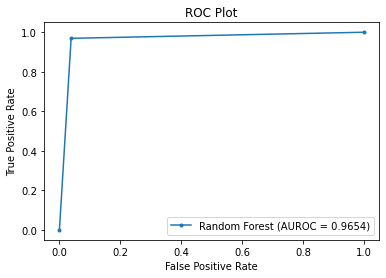

In [49]:
from matplotlib import pyplot
pyplot.plot(fpr2, tpr2, marker='.', label='Random Forest (AUROC = %0.4f)'% auc_dt)
# Title
pyplot.title('ROC Plot')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# Roc curve of RF

In [37]:
auc_rf = roc_auc_score(y_test, y_pred_rf)
auc_rf

0.9641025641025641

In [39]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[76,  2],
       [ 3, 62]])

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

predicted_probab_dt = dt.predict_proba(x_test)
predicted_probab_dt = predicted_probab_dt[:, 1]
fpr2, tpr2, _ = roc_curve(y_test, predicted_probab_dt)

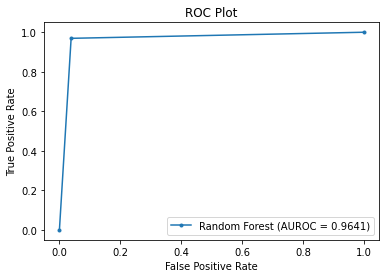

In [50]:
from matplotlib import pyplot
pyplot.plot(fpr2, tpr2, marker='.', label='Random Forest (AUROC = %0.4f)'% auc_rf)
# Title
pyplot.title('ROC Plot')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

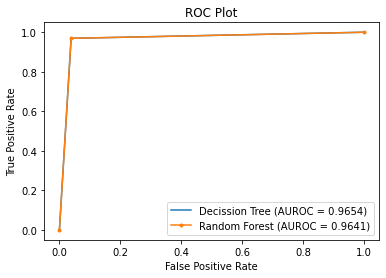

In [52]:
plt.plot(fpr1, tpr1, label='Decission Tree (AUROC = %0.4f)' % auc_dt)
plt.plot(fpr2, tpr2, marker='.', label='Random Forest (AUROC = %0.4f)' % auc_rf)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()